# Opt the opinion after meeting

Time step 0: [100, 100, 50, 50, 0, 0], sum=300
Time step 1: [73.33, 73.33, 66.67, 66.67, 10.0, 10.0], sum=300.0
Time step 2: [47.26, 47.26, 79.41, 79.41, 23.33, 23.33], sum=300.0
Time step 3: [27.25, 27.25, 83.54, 83.54, 39.21, 39.21], sum=300.00000000000006
Time step 4: [15.11, 15.11, 78.97, 78.97, 55.92, 55.92], sum=300.0
Time step 5: [8.74, 8.74, 69.54, 69.54, 71.72, 71.72], sum=300.0
Time step 6: [5.5, 5.5, 58.87, 58.87, 85.62, 85.62], sum=300.0
Time step 7: [3.77, 3.77, 48.83, 48.83, 97.4, 97.4], sum=300.0
Time step 8: [2.79, 2.79, 40.04, 40.04, 107.16, 107.16], sum=300.00000000000006
Time step 9: [2.2, 2.2, 32.63, 32.63, 115.17, 115.17], sum=300.0
Time step 10: [1.81, 1.81, 26.49, 26.49, 121.7, 121.7], sum=300.0000000000001
Time step 11: [1.56, 1.56, 21.45, 21.45, 127.0, 127.0], sum=300.0000000000001
Time step 12: [1.38, 1.38, 17.33, 17.33, 131.29, 131.29], sum=300.0000000000002
Time step 13: [1.25, 1.25, 14.0, 14.0, 134.75, 134.75], sum=300.0000000000002
Time step 14: [1.16, 1.1

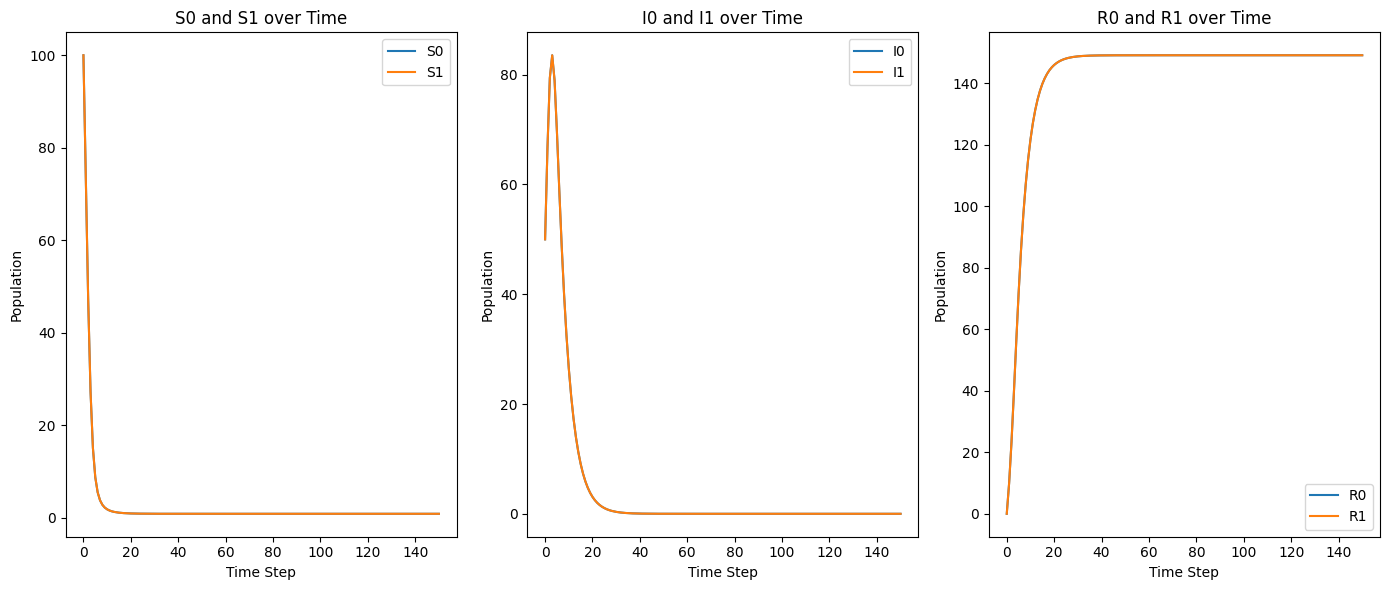

In [1]:
import numpy as np
import matplotlib.pyplot as plt

q = [-10, -20]

def pii1(q):
    return 1 / (1 + np.exp(q))
def pii2(q):
    return np.exp(q) / (1 + np.exp(q))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))
    
    matrix[0, 0] = ps0 + pi0 * (pii1(-10) * (1-beta) + pii2(-10)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pii1(-10) * (1-beta) + pii2(-10)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pii1(-10) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pii1(-10) * beta  # S0 -> I1

    matrix[1, 0] = ps0 + pi0 * (pii1(-20) * (1-beta) + pii2(-20)) + pr0   # S1 -> S0
    matrix[1, 1] = ps1 + pi1 * (pii1(-20) * (1-beta) + pii2(-20)) + pr1  # S1 -> S1
    matrix[1, 2] = pi0 * pii1(-20) * beta  # S1 -> I0
    matrix[1, 3] = pi1 * pii1(-20) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    matrix[3, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I1 -> I0
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I1 -> I1 
    matrix[3, 4] = gamma  * (ps0 + pi0 + pr0) # I1 -> R0
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1  # R1 -> R0
    matrix[5, 4] = ps0 + pi0 + pr0  # R1 -> R1



    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 100, 50, 50, 0, 0])
beta = 0.8  # Example infection rate
gamma = 0.2  # Example recovery rate
steps = 150 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)



# Dominance Model, when if other opinion is higher then one would opt it

Time step 0: [100, 100, 50, 50, 0, 0], sum=300
Time step 1: [36.67, 103.34, 33.33, 73.33, 5.0, 15.0], sum=266.66969319124684
Time step 2: [6.65, 80.29, 11.17, 85.9, 3.28, 38.05], sum=225.3396134228455
Time step 3: [0.36, 49.7, 1.1, 78.85, 0.52, 60.23], sum=190.7558195880885
Time step 4: [0.0, 29.11, 0.01, 64.07, 0.01, 76.73], sum=169.92652672625698
Time step 5: [0.0, 18.14, 0.0, 51.26, 0.0, 89.55], sum=158.9500830931114
Time step 6: [0.0, 12.29, 0.0, 41.01, 0.0, 99.8], sum=153.10170916653726
Time step 7: [0.0, 9.0, 0.0, 32.81, 0.0, 108.01], sum=149.81075275755822
Time step 8: [0.0, 7.03, 0.0, 26.25, 0.0, 114.57], sum=147.8408244283832
Time step 9: [0.0, 5.78, 0.0, 21.0, 0.0, 119.82], sum=146.59359133601487
Time step 10: [0.0, 4.95, 0.0, 16.8, 0.0, 124.02], sum=145.76595357031894
Time step 11: [0.0, 4.38, 0.0, 13.44, 0.0, 127.38], sum=145.1954549117191
Time step 12: [0.0, 3.98, 0.0, 10.75, 0.0, 130.06], sum=144.79006146288518
Time step 13: [0.0, 3.68, 0.0, 8.6, 0.0, 132.21], sum=144.494

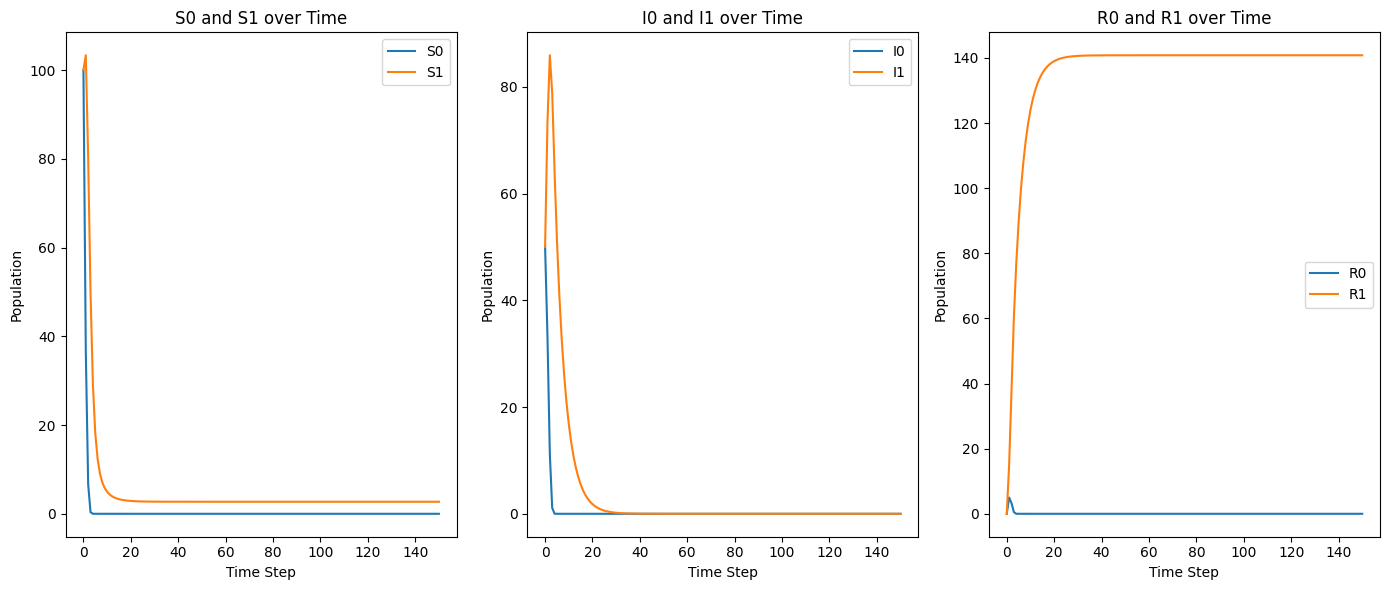

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q = [-10, -20]

def pii1(q):
    return 1 / (1 + np.exp(q))
def pii2(q):
    return np.exp(q) / (1 + np.exp(q))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))

    matrix[0, 0] = ps0 + pi0 * (pii1(-10) * (1-beta) + pii2(-10)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pii1(-10) * (1-beta) + pii2(-10)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pii1(-10) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pii1(-10) * beta  # S0 -> I1

    
    matrix[1, 1] = ps1 + pi1 * (pii2(-10) * (1-beta) + pii2(-10)) + pr1 + ps0 + pi0 * (pii2(-10) * (1-beta) + pii2(-10)) + pr0 # S1 -> S1
    matrix[1, 3] = pi1 * pii2(-10) * beta + pi0 * pii2(-10) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1) + (1-gamma) * (ps0 + pi0 + pr0) # I1 -> I1 
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) + gamma  * (ps0 + pi0 + pr0) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1 + ps0 + pi0 + pr0 # R1 -> R0'



    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 100, 50, 50, 0, 0])
beta = 0.8  # Example infection rate
gamma = 0.2  # Example recovery rate
steps = 150 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)

